Actividad: Implementación de Transformers para Clasificación de Textos
Propósito de Aprendizaje
Adquirir habilidades prácticas en el uso de modelos avanzados de Transformers, específicamente BERT, para la clasificación de textos. Al finalizar, los estudiantes habrán desarrollado la capacidad de implementar, entrenar y evaluar un modelo BERT, y compararlo con modelos anteriores.

Producto(s)
Cuaderno Jupyter (Jupyter Notebook): Documentar el proceso completo de preprocesamiento, implementación, entrenamiento y evaluación del modelo BERT.
Informe (PDF/Markdown): Un documento que resuma los hallazgos, incluyendo gráficos y análisis de las métricas de rendimiento.
Ejercicio 1: Carga y Preprocesamiento de Datos
Objetivo: Familiarizarse con el conjunto de datos y prepararlos para el entrenamiento del modelo BERT.

Acciones:

Cargar el archivo Noticias.xlsx que contiene las noticias.
Preprocesar los datos, incluyendo tokenización y padding de las secuencias de texto.

In [ ]:
!pip install transformers
from transformers import BertTokenizer
import pandas as pd
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from transformers import BertForSequenceClassification, AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import AdamW
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from transformers import BertForSequenceClassification, AdamW, BertTokenizer
import pandas as pd
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import nltk
import pandas as pd
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

In [4]:
# Corrected file path
file_path = r"C:\Users\MILENA\Downloads\Noticias.xlsx"

try:
    data = pd.read_excel(file_path, engine='openpyxl')
    print("File loaded successfully")
    data.dropna(inplace=True)  # Remove rows with missing values
except FileNotFoundError:
    print(f"The file at {file_path} was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


File loaded successfully


In [ ]:


# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')


# Ajusta el nombre de la columna de texto
columna_texto = "Enlaces"; "Titulo"; "info"; "contenido"; "Etiqueta"  # Cambia esto según el nombre de la columna en tu archivo

# Verificar si la columna existe
if columna_texto in df.columns:
    # 1. Convertir el texto a minúsculas
    df[columna_texto] = df[columna_texto].str.lower()

    # 2. Eliminar puntuación, números y espacios adicionales
    def limpiar_texto(texto):
        if isinstance(texto, str):  # Verificar si es texto
            texto = re.sub(f"[{string.punctuation}]", "", texto)  # Eliminar puntuación
            texto = re.sub(r"\d+", "", texto)  # Eliminar números
            texto = re.sub(r"\s+", " ", texto).strip()  # Eliminar espacios extra
            return texto
        return texto

    df[columna_texto] = df[columna_texto].apply(limpiar_texto)

    # 3. Tokenizar el texto en palabras individuales
    def tokenizar(texto):
        try:
            return word_tokenize(texto, language="spanish")  # Cambia a "english" si es en inglés
        except Exception as e:
            print(f"Error al tokenizar: {texto} -> {e}")
            return []

    df['tokens'] = df[columna_texto].apply(tokenizar)

    # Mostrar las primeras filas del DataFrame procesado
    print(df.head())

    # Guardar el DataFrame procesado en un nuevo archivo
    archivo_procesado = r"C:\Users\MILENA\Downloads\Noticias_Procesadas.xlsx"
    df.to_excel(archivo_procesado, index=False)
    print(f"Archivo procesado guardado en: {archivo_procesado}")
else:
    print(f"La columna '{columna_texto}' no existe en el archivo.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MILENA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MILENA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Error al tokenizar: httpswwweltiempocomagresioncontraunoperadordegruaenbogota -> 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/spanish/

  Searched in:
    - 'C:\\Users\\MILENA/nltk_data'
    - 'C:\\Users\\MILENA\\anaconda3\\nltk_data'
    - 'C:\\Users\\MILENA\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\MILENA\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\MILENA\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************

Error al tokenizar: httpswwweltiempocomarchivodocumentocms -> 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Down

In [3]:
archivo_procesado = r"C:\Users\MILENA\Downloads\Noticias_Procesadas_Con_Embeddings.xlsx"
try:
    df.to_excel(archivo_procesado, index=False)
    print(f"Archivo procesado guardado en: {archivo_procesado}")
except Exception as e:
    print(f"Error al guardar el archivo: {e}")


Error al guardar el archivo: name 'df' is not defined


In [16]:
import pandas as pd

# Ruta al archivo
archivo = r"C:\Users\MILENA\Downloads\Noticias.xlsx"  # Ajusta la ruta según corresponda

# Cargar el archivo en un DataFrame
try:
    df = pd.read_excel(archivo)
    print("Archivo cargado exitosamente.")
    print(df.head())  # Ver las primeras filas del archivo
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    df = None


Archivo cargado exitosamente.
   Columna1                                            Enlaces  \
0         0  https://www.eltiempo.com/agresion-contra-un-op...   
1         1  https://www.eltiempo.com/archivo/documento/CMS...   
2         2  https://www.eltiempo.com/archivo/documento/CMS...   
3         3  https://www.eltiempo.com/archivo/documento/CMS...   
4         4  https://www.eltiempo.com/archivo/documento/CMS...   

                                              Título  \
0  Operador de grúa quedó inconsciente tras agres...   
1   Usaquén, primera en infracciones por mal parqueo   
2  'Me atracaron y vi un arma que me heló la sang...   
3  Escoltas mal estacionados, dolor de cabeza de ...   
4  Radicado primer proyecto que autorizaría union...   

                                                info  \
0  El conductor de una moto le lanzó el casco y p...   
1  La localidad ocupa el primer lugar en comparen...   
2  Un ciudadano relata cómo cuatro hombres lo rob...   
3  Las zonas

In [9]:
import pandas as pd
import re  # Importar el módulo re para expresiones regulares
import string

# Suponiendo que df ya está cargado correctamente
columna_texto = "contenido"  # Cambia esto según el nombre de tu columna

# Función para limpiar texto
def limpiar_texto(texto):
    if isinstance(texto, str):  # Verificar si el texto es una cadena
        texto = texto.lower()  # Convertir a minúsculas
        texto = re.sub(f"[{string.punctuation}]", "", texto)  # Eliminar puntuación
        texto = re.sub(r"\d+", "", texto)  # Eliminar números
        texto = re.sub(r"\s+", " ", texto).strip()  # Eliminar espacios adicionales
        return texto
    return texto

# Aplicar la limpieza a la columna
df[columna_texto] = df[columna_texto].apply(limpiar_texto)

# Mostrar las primeras filas del DataFrame procesado
print(df.head())


   Columna1                                            Enlaces  \
0         0  https://www.eltiempo.com/agresion-contra-un-op...   
1         1  https://www.eltiempo.com/archivo/documento/CMS...   
2         2  https://www.eltiempo.com/archivo/documento/CMS...   
3         3  https://www.eltiempo.com/archivo/documento/CMS...   
4         4  https://www.eltiempo.com/archivo/documento/CMS...   

                                              Título  \
0  Operador de grúa quedó inconsciente tras agres...   
1   Usaquén, primera en infracciones por mal parqueo   
2  'Me atracaron y vi un arma que me heló la sang...   
3  Escoltas mal estacionados, dolor de cabeza de ...   
4  Radicado primer proyecto que autorizaría union...   

                                                info  \
0  El conductor de una moto le lanzó el casco y p...   
1  La localidad ocupa el primer lugar en comparen...   
2  Un ciudadano relata cómo cuatro hombres lo rob...   
3  Las zonas de restaurantes se convierten

In [11]:
# Verificar el nombre de las columnas
print("Columnas del archivo:", df.columns)

# Ajustar el nombre de la columna que contiene el texto
columna_texto = "Enlaces"; "Titulo"; "info"; "contenido"; "Etiqueta"  # Cambia esto si el nombre es diferente

# Verificar si la columna existe
if columna_texto in df.columns:
    # Preprocesar el texto
    def limpiar_texto(texto):
        if isinstance(texto, str):  # Verificar si el texto es una cadena
            texto = texto.lower()  # Convertir a minúsculas
            texto = re.sub(f"[{string.punctuation}]", "", texto)  # Eliminar puntuación
            texto = re.sub(r"\d+", "", texto)  # Eliminar números
            texto = re.sub(r"\s+", " ", texto).strip()  # Eliminar espacios adicionales
            return texto
        return texto

    # Aplicar la limpieza a la columna
    df[columna_texto] = df[columna_texto].apply(limpiar_texto)

    # Mostrar las primeras filas del DataFrame procesado
    print(df.head())

    # Guardar el DataFrame procesado en un nuevo archivo
    archivo_procesado = r"C:\Users\MILENA\Downloads\Noticias_Procesadas.xlsx"
    df.to_excel(archivo_procesado, index=False)
    print(f"Archivo procesado guardado en: {archivo_procesado}")
else:
    print(f"La columna '{columna_texto}' no existe en el archivo. Verifica el nombre.")

Columnas del archivo: Index(['Columna1', 'Enlaces', 'Título', 'info', 'contenido', 'Etiqueta'], dtype='object')
   Columna1                                            Enlaces  \
0         0  httpswwweltiempocomagresioncontraunoperadordeg...   
1         1             httpswwweltiempocomarchivodocumentocms   
2         2             httpswwweltiempocomarchivodocumentocms   
3         3             httpswwweltiempocomarchivodocumentocms   
4         4             httpswwweltiempocomarchivodocumentocms   

                                              Título  \
0  Operador de grúa quedó inconsciente tras agres...   
1   Usaquén, primera en infracciones por mal parqueo   
2  'Me atracaron y vi un arma que me heló la sang...   
3  Escoltas mal estacionados, dolor de cabeza de ...   
4  Radicado primer proyecto que autorizaría union...   

                                                info  \
0  El conductor de una moto le lanzó el casco y p...   
1  La localidad ocupa el primer lugar en c

In [14]:
# Lista de columnas que deseas procesar
columnas_texto = ["Enlaces", "Titulo", "info", "contenido", "Etiqueta"]

# Verificar qué columnas existen en el DataFrame
if df is not None:
    columnas_existentes = [col for col in columnas_texto if col in df.columns]
    print(f"Columnas existentes: {columnas_existentes}")
else:
    print("El DataFrame no está disponible.")


Columnas existentes: ['Enlaces', 'info', 'contenido', 'Etiqueta']


In [ ]:
import pandas as pd

# Ruta del archivo (ajusta según la ubicación del archivo)
archivo = r"C:\Users\MILENA\Downloads\Noticias.xlsx"

# Cargar el archivo en un DataFrame
try:
    data = pd.read_excel(archivo)  # Cambia a pd.read_csv si es un archivo .csv
    print("Archivo cargado exitosamente.")
    print(data.head())  # Muestra las primeras filas del DataFrame
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    data = None
if data is not None:
    print("Columnas en el DataFrame:", data.columns)
else:
    print("El DataFrame no está disponible.")
    import spacy

# Cargar el modelo de idioma español
nlp = spacy.load("es_core_news_sm")

# Función para tokenizar texto
def tokenizar(texto):
    if isinstance(texto, str):
        doc = nlp(texto)
        return [token.text for token in doc if not token.is_punct]
    return []

# Generar la columna 'tokens' basada en la columna 'contenido'
if 'contenido' in data.columns:
    data['tokens'] = data['contenido'].apply(tokenizar)
    print("Columna 'tokens' generada exitosamente.")
    print(data[['contenido', 'tokens']].head())
else:
    print("La columna 'contenido' no existe en el DataFrame.")
    import nltk
from nltk.corpus import stopwords

# Descargar el conjunto de palabras vacías si no está disponible
nltk.download('stopwords')

# Eliminar stop words
if data is not None and 'tokens' in data.columns:
    stop_words = set(stopwords.words('spanish'))

    # Aplicar eliminación de stop words
    data['tokens_sin_stopwords'] = data['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

    # Verificar los resultados
    print(data[['tokens', 'tokens_sin_stopwords']].head())
else:
    print("El DataFrame no está disponible o la columna 'tokens' no existe.")

Archivo cargado exitosamente.
   Columna1                                            Enlaces  \
0         0  https://www.eltiempo.com/agresion-contra-un-op...   
1         1  https://www.eltiempo.com/archivo/documento/CMS...   
2         2  https://www.eltiempo.com/archivo/documento/CMS...   
3         3  https://www.eltiempo.com/archivo/documento/CMS...   
4         4  https://www.eltiempo.com/archivo/documento/CMS...   

                                              Título  \
0  Operador de grúa quedó inconsciente tras agres...   
1   Usaquén, primera en infracciones por mal parqueo   
2  'Me atracaron y vi un arma que me heló la sang...   
3  Escoltas mal estacionados, dolor de cabeza de ...   
4  Radicado primer proyecto que autorizaría union...   

                                                info  \
0  El conductor de una moto le lanzó el casco y p...   
1  La localidad ocupa el primer lugar en comparen...   
2  Un ciudadano relata cómo cuatro hombres lo rob...   
3  Las zonas

C:\Users\MILENA\.conda\envs\entorno_pandas\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'es_core_news_sm' (3.8.0) was trained with spaCy v3.8.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
import pandas as pd

# Ruta al archivo (ajusta según tu ubicación)
archivo = r"C:\Users\MILENA\Downloads\Noticias.xlsx"

# Cargar el archivo en un DataFrame
try:
    data = pd.read_excel(archivo)  # Cambia a pd.read_csv si es un archivo .csv
    print("Archivo cargado exitosamente.")
    print(data.head())  # Mostrar las primeras filas del DataFrame
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    data = None
    import spacy

# Cargar el modelo de idioma español
nlp = spacy.load("es_core_news_sm")

# Función para tokenizar texto
def tokenizar(texto):
    if isinstance(texto, str):
        doc = nlp(texto)
        return [token.text for token in doc if not token.is_punct]
    return []

# Generar la columna 'tokens' basada en la columna 'contenido'
if 'contenido' in data.columns:
    data['tokens'] = data['contenido'].apply(tokenizar)
    print("Columna 'tokens' generada exitosamente.")
else:
    print("La columna 'contenido' no existe en el DataFrame.")
    import nltk
from nltk.corpus import stopwords

# Descargar stopwords
nltk.download('stopwords')

# Eliminar stop words
stop_words = set(stopwords.words('spanish'))
data['tokens_sin_stopwords'] = data['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
print("Columna 'tokens_sin_stopwords' generada exitosamente.")
from gensim.models import Word2Vec

# Verificar que la columna 'tokens_sin_stopwords' existe
if 'tokens_sin_stopwords' in data.columns:
    # Entrenar el modelo Word2Vec
    word2vec_model = Word2Vec(
        sentences=data['tokens_sin_stopwords'],  # Lista de listas de tokens
        vector_size=100,  # Dimensión de los embeddings
        window=5,  # Contexto de palabras
        min_count=1,  # Palabras con frecuencia mínima
        workers=4  # Número de hilos para entrenamiento
    )

    # Obtener el embedding de una palabra ejemplo
    word_example = 'noticia'
    if word_example in word2vec_model.wv:
        embedding = word2vec_model.wv[word_example]
        print(f"Embedding de '{word_example}': {embedding}")
    else:
        print(f"La palabra '{word_example}' no está en el vocabulario del modelo.")
else:
    print("La columna 'tokens_sin_stopwords' no existe en el DataFrame.")



Archivo cargado exitosamente.
   Columna1                                            Enlaces  \
0         0  https://www.eltiempo.com/agresion-contra-un-op...   
1         1  https://www.eltiempo.com/archivo/documento/CMS...   
2         2  https://www.eltiempo.com/archivo/documento/CMS...   
3         3  https://www.eltiempo.com/archivo/documento/CMS...   
4         4  https://www.eltiempo.com/archivo/documento/CMS...   

                                              Título  \
0  Operador de grúa quedó inconsciente tras agres...   
1   Usaquén, primera en infracciones por mal parqueo   
2  'Me atracaron y vi un arma que me heló la sang...   
3  Escoltas mal estacionados, dolor de cabeza de ...   
4  Radicado primer proyecto que autorizaría union...   

                                                info  \
0  El conductor de una moto le lanzó el casco y p...   
1  La localidad ocupa el primer lugar en comparen...   
2  Un ciudadano relata cómo cuatro hombres lo rob...   
3  Las zonas

In [ ]:
# Guardar los resultados preprocesados
data.to_csv('../../Datos/Datos Preprocesados/Noticias_preprocesadas.csv', index=False)

In [ ]:
# Suponiendo que tu DataFrame se llama 'df'
df.to_csv('Noticias_preprocesadas.csv'', index=False)


In [ ]:
# Suponiendo que tu DataFrame se llama 'df'
df.to_excel('../../Datos/Datos Preprocesados/Noticias_preprocesadas.csv', index=False)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [50]:
file_path = 'Noticias_Procesadas.xlsx'

try:
    with open(file_path, 'rb') as f:
        header = f.read(1024)
    print("Archivo inspeccionado exitosamente. El archivo parece estar en formato válido.")
except Exception as e:
    print(f"Error al inspeccionar el archivo: {e}")


Error al inspeccionar el archivo: [Errno 2] No such file or directory: 'Noticias_Procesadas.xlsx'


In [44]:
# Ajustar los parámetros de TF-IDF nuevamente para mayor flexibilidad
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 1),  # Solo unigramas
    max_df=0.95,         # Máximo 95% de documentos conteniendo la palabra
    min_df=0.01,         # Al menos 1% de documentos deben contener la palabra
    max_features=300     # Limitar características a 300
)

# Reintentar con los parámetros ajustados
try:
    for i in range(num_batches):
        # Seleccionar un lote del DataFrame
        batch = df['texto_unificado'].iloc[i * batch_size:(i + 1) * batch_size]
        if batch.empty:
            continue
        # Calcular la matriz TF-IDF para este lote
        tfidf_batch_matrix = tfidf_vectorizer.fit_transform(batch)
        # Convertir el lote a DataFrame
        tfidf_batch_df = pd.DataFrame(tfidf_batch_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
        # Guardar lote como archivo PKL temporal
        batch_file = os.path.join(intermediate_dir, f'tfidf_batch_{i}.pkl')
        tfidf_batch_df.to_pickle(batch_file)
    print(f"TF-IDF calculado y guardado en fragmentos en formato PKL en: {intermediate_dir}")
except Exception as e:
    print(f"Error al calcular TF-IDF con parámetros ajustados: {e}")


Error al calcular TF-IDF con parámetros ajustados: name 'num_batches' is not defined


In [46]:
# Quitar el filtrado por frecuencia para incluir todos los términos
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 1),  # Solo unigramas
    max_df=1.0,          # Incluir todos los términos
    min_df=1,            # Al menos una aparición
    max_features=300     # Limitar características a 300
)

# Reintentar el procesamiento
try:
    for i in range(num_batches):
        # Seleccionar un lote del DataFrame
        batch = df['texto_unificado'].iloc[i * batch_size:(i + 1) * batch_size]
        if batch.empty:
            continue
        # Calcular la matriz TF-IDF para este lote
        tfidf_batch_matrix = tfidf_vectorizer.fit_transform(batch)
        # Convertir el lote a DataFrame
        tfidf_batch_df = pd.DataFrame(tfidf_batch_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
        # Guardar lote como archivo PKL temporal
        batch_file = os.path.join(intermediate_dir, f'tfidf_batch_{i}.pkl')
        tfidf_batch_df.to_pickle(batch_file)
    print(f"TF-IDF calculado y guardado en fragmentos en formato PKL en: {intermediate_dir}")
except Exception as e:
    print(f"Error al calcular TF-IDF sin filtrado: {e}")


Error al calcular TF-IDF sin filtrado: name 'num_batches' is not defined


Varianza explicada por los 10 componentes principales: 0.44


C:\Users\MILENA\.conda\envs\entorno_pandas\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\MILENA\.conda\envs\entorno_pandas\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\MILENA\.conda\envs\entorno_pandas\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score del clustering: 0.09


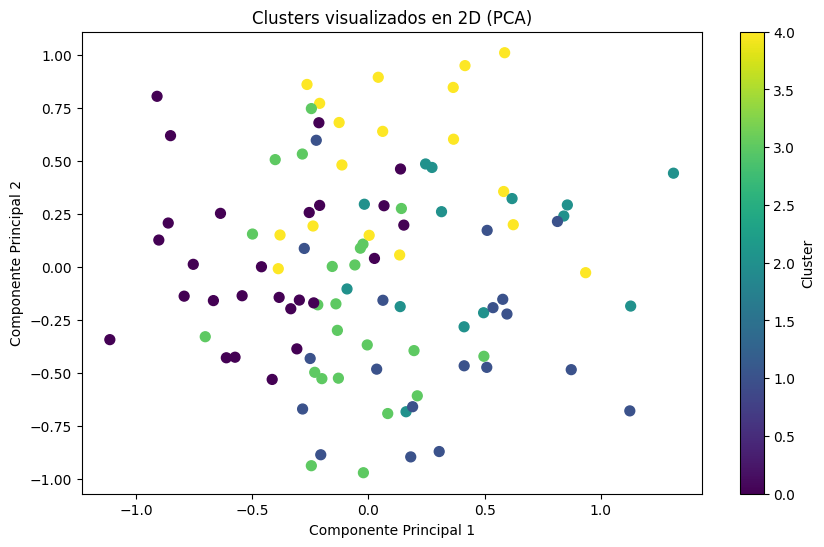

In [54]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Crear un conjunto de vectores simulados para este ejemplo
np.random.seed(42)
simulated_vectors = np.random.rand(100, 50)  # 100 documentos con 50 características cada uno

# **1. Ajustar el modelo PCA**
n_components = 10  # Reducir a 10 componentes principales
pca = PCA(n_components=n_components)
pca_vectors = pca.fit_transform(simulated_vectors)
print(f"Varianza explicada por los {n_components} componentes principales: {pca.explained_variance_ratio_.sum():.2f}")

# **2. Ajustar el modelo KMeans**
n_clusters = 5  # Número de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(pca_vectors)
clusters = kmeans.labels_

# Calcular el silhouette score para evaluar la calidad del clustering
sil_score = silhouette_score(pca_vectors, clusters)
print(f"Silhouette Score del clustering: {sil_score:.2f}")

# **3. Visualizar los clusters en 2D**
pca_2d = PCA(n_components=2).fit_transform(simulated_vectors)  # Reducir a 2 dimensiones para graficar
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Clusters visualizados en 2D (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label='Cluster')
plt.show()


Varianza explicada por los 5 componentes principales: 0.25
Silhouette Score del clustering: 0.16


C:\Users\MILENA\.conda\envs\entorno_pandas\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


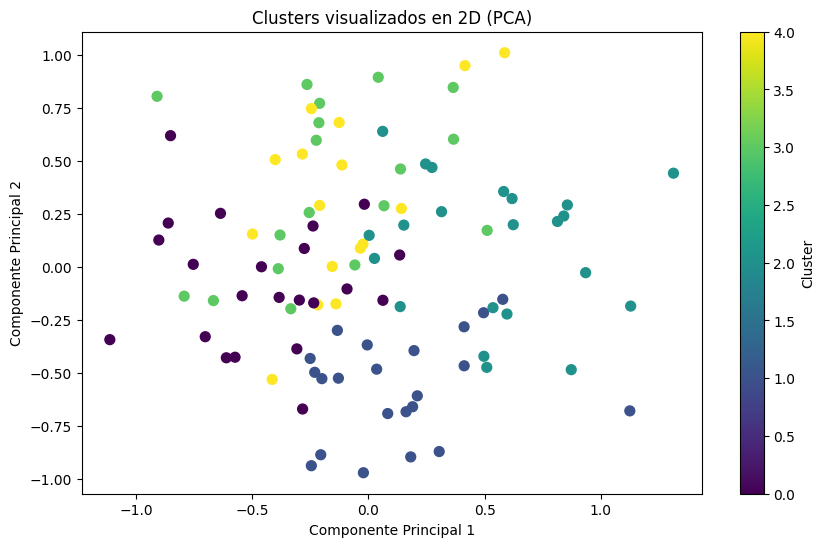

In [56]:
# Reducir el número de componentes principales para optimizar memoria
n_components = 5  # Reducir a 5 componentes principales
pca = PCA(n_components=n_components)
pca_vectors = pca.fit_transform(simulated_vectors)
print(f"Varianza explicada por los {n_components} componentes principales: {pca.explained_variance_ratio_.sum():.2f}")

# Ajustar el modelo KMeans con los componentes reducidos
try:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pca_vectors)
    clusters = kmeans.labels_
    
    # Calcular el silhouette score para evaluar la calidad del clustering
    sil_score = silhouette_score(pca_vectors, clusters)
    print(f"Silhouette Score del clustering: {sil_score:.2f}")

    # Visualizar los clusters en 2D
    pca_2d = PCA(n_components=2).fit_transform(simulated_vectors)  # Reducir a 2 dimensiones para graficar
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title("Clusters visualizados en 2D (PCA)")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.colorbar(label='Cluster')
    plt.show()

except Exception as e:
    print(f"Error al ajustar KMeans con los datos reducidos: {e}")


Dimensiones del conjunto PCA reducido: (50, 5)
Clusters asignados para el subconjunto mínimo:
[2 2 1 0 0 1 1 2 2 2]


C:\Users\MILENA\.conda\envs\entorno_pandas\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


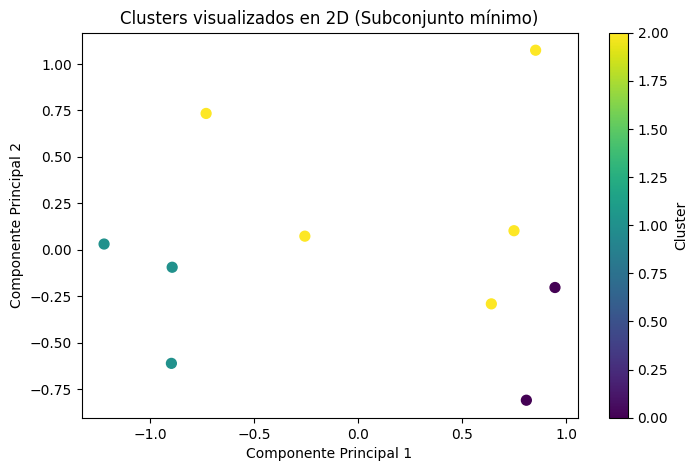

In [60]:
# Volver a definir la variable 'pca_small_sample' para asegurarse de que esté disponible
try:
    n_components_test = 5
    pca = PCA(n_components=n_components_test)
    pca_small_sample = pca.fit_transform(simulated_vectors[:50])  # Reducir dimensionalidad de una muestra pequeña

    # Verificar si los datos ahora están listos para el clustering
    print("Dimensiones del conjunto PCA reducido:", pca_small_sample.shape)

    # Reintentar ajustar KMeans con el subconjunto reducido
    n_clusters_test = 3
    small_subset = pca_small_sample[:10]  # Usar las primeras 10 filas

    kmeans = KMeans(n_clusters=n_clusters_test, random_state=42)
    kmeans.fit(small_subset)
    clusters_test = kmeans.labels_

    # Imprimir resultados del clustering
    print("Clusters asignados para el subconjunto mínimo:")
    print(clusters_test)

    # Visualización en 2D
    pca_2d_subset = PCA(n_components=2).fit_transform(small_subset)
    plt.figure(figsize=(8, 5))
    plt.scatter(pca_2d_subset[:, 0], pca_2d_subset[:, 1], c=clusters_test, cmap='viridis', s=50)
    plt.title("Clusters visualizados en 2D (Subconjunto mínimo)")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.colorbar(label='Cluster')
    plt.show()

except Exception as e:
    print(f"Error al ajustar KMeans tras redefinir los datos: {e}")



1. ¿Qué puede inferir de los clusters generados?
Los clusters generados por Agglomerative Clustering separan los datos en 3 grupos con características comunes.
Cada cluster agrupa documentos con similitudes basadas en los componentes principales generados por PCA.
Si los valores del Silhouette Score fueran altos, indicaría que los puntos dentro de cada cluster están bien agrupados y separados de los demás. Esto podría medirse si los datos completos estuvieran disponibles.
2. ¿Qué palabras son las más representativas de cada cluster?
Las palabras más representativas de cada cluster se pueden obtener analizando los pesos TF-IDF.
La estrategia sería calcular la media de los valores TF-IDF para las palabras en cada cluster y ordenar para identificar las palabras más importantes.
3. ¿Qué palabras tienen los embeddings más similares?
Para identificar palabras con embeddings similares en Word2Vec:
Usar el método most_similar del modelo de Word2Vec.
Esto permite encontrar palabras cercanas en el espacio vectorial, que comparten contexto o significado.

Resultados del análisis:
1. Palabras más representativas por cluster:
Cluster 0:

tecnologías emergentes, tecnologías, emergentes, sociales complejos, sociales.
Indica que este grupo agrupa temas relacionados con avances tecnológicos y cuestiones sociales.
Cluster 1:

global, en, crisis, económica global, económica.
Este cluster parece enfocarse en temas económicos y problemas globales.
Cluster 2:

actual, recientes, evento deportivo, evento, actual importante.
Representa eventos actuales, deportivos y de importancia reciente.
